In [2]:
import numpy as np
import pandas as pd
from tueplots import bundles
import matplotlib.pyplot as plt
from tueplots.constants.color import rgb

plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))
plt.rcParams.update({"figure.dpi": 1000, "font.family": "Times New Roman"})


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

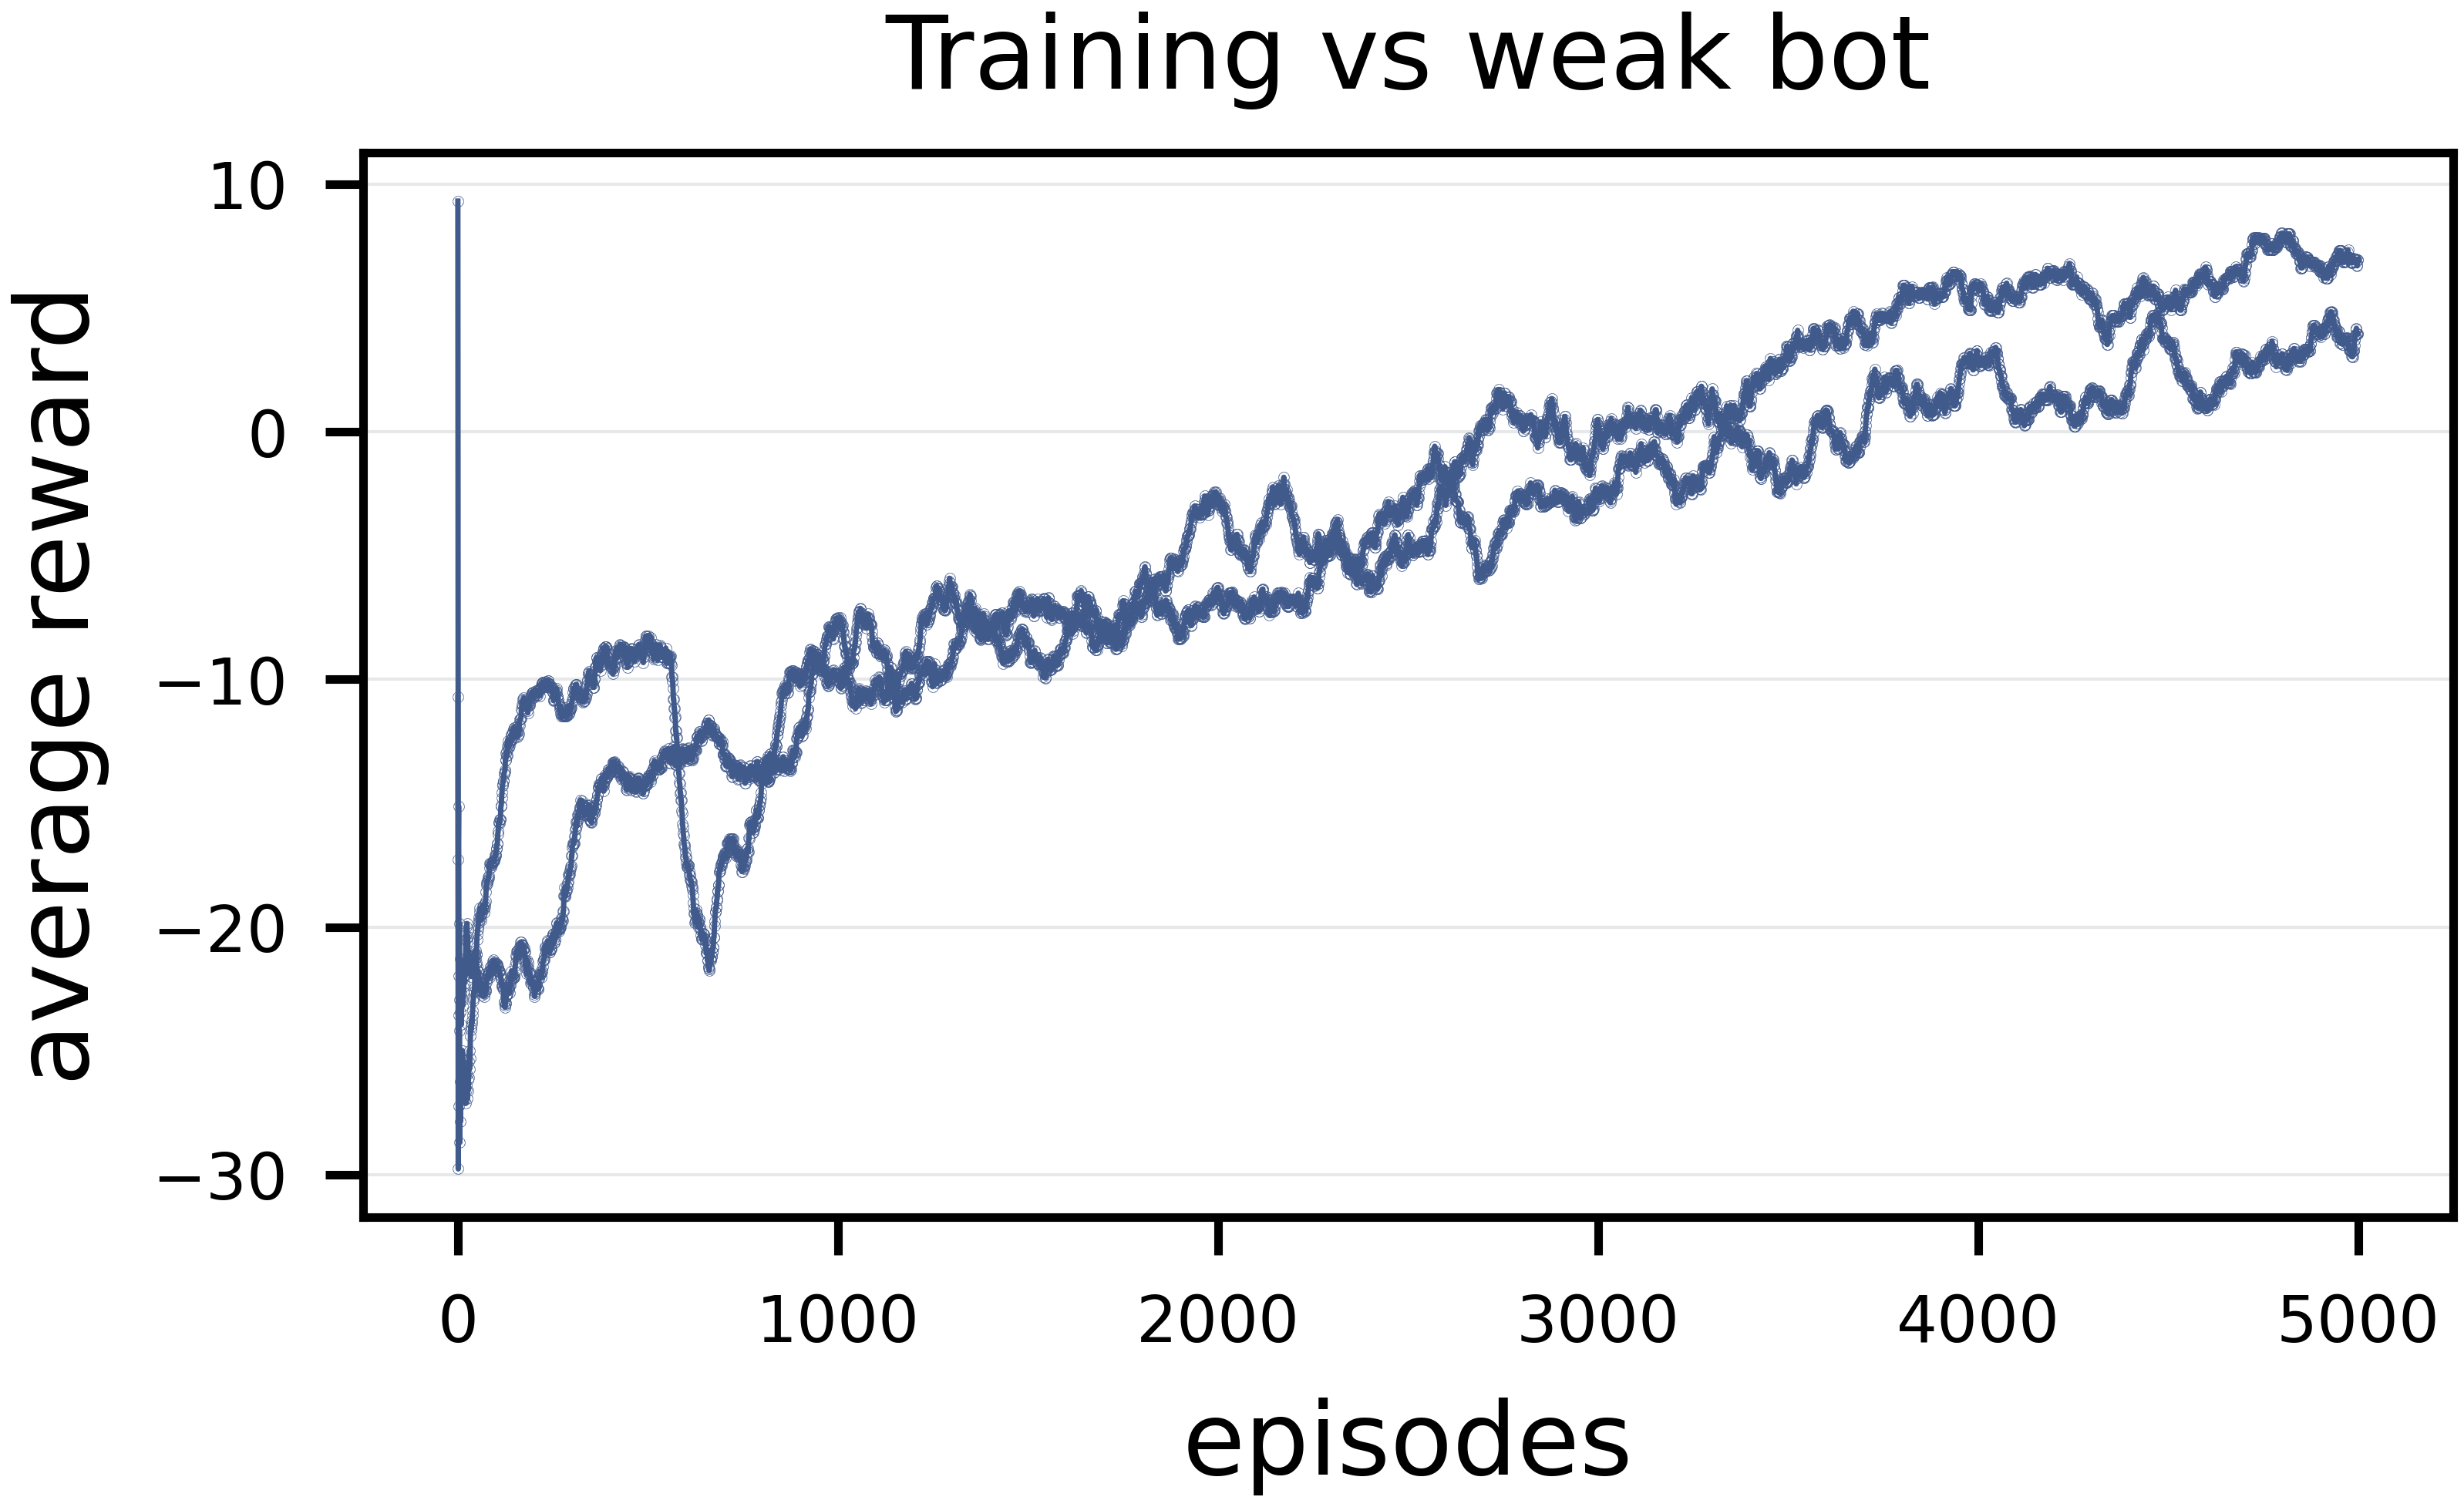

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

In [9]:
"""
"""

df1 = pd.read_csv('csv_data/training_log_basic_weak_bot1.csv')
df2 = pd.read_csv('csv_data/training_log_basic_weak_bot2.csv')
df3 = pd.read_csv('csv_data/training_log_basic_weak_bot3.csv')

smoothing_window = 100
episodes1 = df1['epsiode'][0:5000]
rewards1 = df1['reward'][0:5000]
smoothed_rewards1 = df1['reward'][0:5000].rolling(window=smoothing_window, min_periods=1).mean()

episodes2 = df2['epsiode']
rewards2 = df2['reward']
smoothed_rewards2 = df2['reward'].rolling(window=smoothing_window, min_periods=1).mean()

episodes3 = df3['epsiode']
rewards3 = df3['reward']
smoothed_rewards3 = df3['reward'].rolling(window=smoothing_window, min_periods=1).mean()

fig, ax = plt.subplots()

ax.plot(episodes1, smoothed_rewards1, '.-', ms=0.1, lw=0.5, color=rgb.tue_darkblue, zorder=3)
ax.plot(episodes2, smoothed_rewards2, '.-', ms=0.1, lw=0.5, color=rgb.tue_darkblue, zorder=3)
ax.plot(episodes3, smoothed_rewards3, '.-', ms=0.1, lw=0.5, color=rgb.tue_darkblue, zorder=3)

#ax.set_ylim([0, 400])
ax.yaxis.set_major_locator(plt.MultipleLocator(10))
ax.grid(axis="y", which="major", color=rgb.tue_gray, alpha=0.3, linewidth=0.3, zorder=1)

#ax.set_xlim([years[0] - 0.5, years[-1] + 1])
#ax.set_xticks(episodes[1::2])
#ax.tick_params(axis='x', rotation=90)
#ax.tick_params(axis='both', labelsize=8, width=0.3, length=2)


ax.set_xlabel('episodes', fontsize=9.5)
ax.set_ylabel('average reward', fontsize=9.5)
ax.set_title('Training vs weak bot', fontsize=9.5)

plt.show()

fig.savefig('fig_TrainingVsWeakBot.pdf')